<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preambles" data-toc-modified-id="Preambles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preambles</a></span></li><li><span><a href="#Static-part" data-toc-modified-id="Static-part-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Static part</a></span></li><li><span><a href="#Dynamical-part" data-toc-modified-id="Dynamical-part-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dynamical part</a></span></li><li><span><a href="#Analyze-results" data-toc-modified-id="Analyze-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyze results</a></span></li><li><span><a href="#Sweep-coupling" data-toc-modified-id="Sweep-coupling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sweep coupling</a></span></li><li><span><a href="#Calibrate-gate" data-toc-modified-id="Calibrate-gate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Calibrate gate</a></span></li><li><span><a href="#Try-some-rotations-+-iSWAP-here" data-toc-modified-id="Try-some-rotations-+-iSWAP-here-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Try some rotations + iSWAP here</a></span><ul class="toc-item"><li><span><a href="#Correct-single-qubit-gates" data-toc-modified-id="Correct-single-qubit-gates-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Correct single qubit gates</a></span></li></ul></li></ul></div>

# Preambles

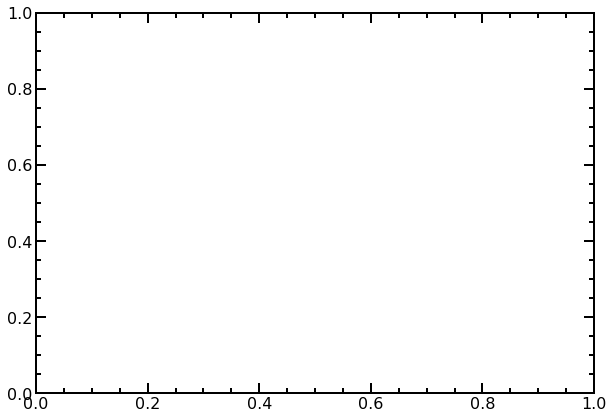

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as evol_gates
from Fluxonium_hamiltonians import qchard_evolgates_twod as evol_gates_2d
import plotting_settings
import scipy.linalg
from qutip.qip.operations import*

# Static part

In [2]:
#Define coupled two-level system Hamiltonian
IZ = tensor(qeye(2), sigmaz())
ZI = tensor(sigmaz(), qeye(2))
XI = tensor(sigmax(), qeye(2))
IX = tensor(qeye(2), sigmax())
YI = tensor(sigmay(), qeye(2))
IY = tensor(qeye(2), sigmay())
XX = tensor(sigmax(), sigmax())

def two_q_hamiltonian(w1, w2, J):
    return -0.5*w1*ZI - 0.5*w2*IZ + J*XX

#Static part
w1 = 5.2
w2 = 5.3
#Static part
#Ravi's paper LO is at 5.425 GHz, detuned by -130MHz, qubit 4 is at 5.25 GHz, qubit 4 is at 5.3
#zeta_ZZ -> 4 MHz, driven with same aplitubes

J = 5e-3 #GHz
H0 = two_q_hamiltonian(w1, w2, J)
eig_energies, eig_states = H0.eigenstates() #System

In [3]:
state_00 = eig_states[0]
state_01 = eig_states[2]
state_10 = eig_states[1]
state_11 = eig_states[3]
sup_state_p0 = (state_00 + state_10)/np.sqrt(2)
sup_state_p1 = (state_01 + state_11)/np.sqrt(2)
sup_state_0p = (state_00 + state_01)/np.sqrt(2)
sup_state_1p = (state_10 + state_11)/np.sqrt(2)

# Dynamical part

In [4]:
#Driving part
delta_omega_d = 30e-3
coupl_const = 50 #MHz
coupl_const = coupl_const*1e-3 * 2 *np.pi

drive_freq1 = eig_energies[1]-eig_energies[0] - delta_omega_d #qubit A
drive_freq2 = eig_energies[2]-eig_energies[0] + delta_omega_d #qubit B

H1 = coupl_const*(XI) 
H2 = coupl_const*(IX)

#Gate parameters
T_start = 0
T_gate = 300
# shape = 'gauss'
shape = 'cosflattop'
sigma = 0.25
T_rise = 50
drag = False
drag_coeff = 0.3
t_points = np.linspace(0,T_gate, 2*int(T_gate)+1)

#Using propagator
H_dum = tensor(qeye(2), qeye(2))
U_t = evol_gates_2d.evolution_operator_microwave_nonorm(H0,H1,H2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d1=drive_freq1, omega_d2 = drive_freq2)
# U_nothing = gates.evolution_operator_microwave(-H0,H_dum, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
#         T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d=drive_freq1)

# Analyze results

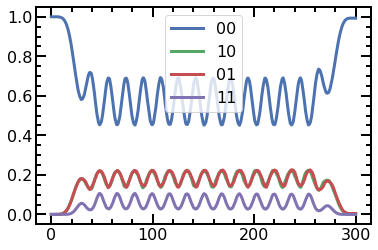

In [5]:
transition_00_00 = expect(state_00*state_00.dag(), U_t*state_00)
transition_00_10 = expect(state_10*state_10.dag(), U_t*state_00)
transition_00_01 = expect(state_01*state_01.dag(), U_t*state_00)
transition_00_11 = expect(state_11*state_11.dag(), U_t*state_00)

plt.plot(t_points, transition_00_00, label = '00')
plt.plot(t_points, transition_00_10, label = '10')
plt.plot(t_points, transition_00_01, label = '01')
plt.plot(t_points, transition_00_11, label = '11')
plt.legend()

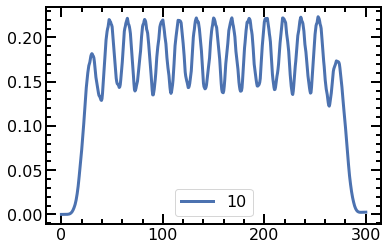

In [6]:
transition_01_10 = expect(state_10*state_10.dag(), U_t*state_01)
transition_01_10 = expect(state_10*state_10.dag(), U_t*state_00)
transition_01_01 = expect(state_01*state_01.dag(), U_t*state_00)
transition_01_11 = expect(state_11*state_11.dag(), U_t*state_00)

plt.plot(t_points, transition_01_10, label = '10')
# plt.plot(t_points, transition_00_10, label = '10')
# plt.plot(t_points, transition_00_01, label = '01')
# plt.plot(t_points, transition_00_11, label = '11')
plt.legend()

In [7]:
phase_ZI = np.zeros_like(t_points)
phase_IZ = np.zeros_like(t_points)
phase_ZZ = np.zeros_like(t_points)
U_rw = U_nothing*U_t

for tind in range(len(t_points)):
    u00 = U_rw [tind].matrix_element(state_00.dag(), state_00)
    u01 = U_rw [tind].matrix_element(state_01.dag(), state_01)
    u10 = U_rw [tind].matrix_element(state_10.dag(), state_10)
    u11 = U_rw [tind].matrix_element(state_11.dag(), state_11)
    phase_ZI[tind] = (np.angle(u00*u01 / (u10*u11)))
    phase_IZ[tind] = (np.angle(u00*u10 / (u01*u11)))
    phase_ZZ[tind] = (np.angle(u00*u11 / (u10*u01)))
    
phase_ZI = np.unwrap (phase_ZI)
phase_IZ = np.unwrap (phase_IZ)
phase_ZZ = np.unwrap (phase_ZZ)

NameError: name 'U_nothing' is not defined

In [ ]:
plt.plot(t_points, (phase_IZ))
plt.plot(t_points, (phase_ZI))
zeta_IZ = (phase_IZ[-1] - phase_IZ[0])/(t_points[-1]*2*np.pi)*1e3
zeta_ZI = (phase_ZI[-1] - phase_ZI[0])/(t_points[-1]*2*np.pi)*1e3

print (zeta_ZI)
print (zeta_IZ)

# U_t[250]*state_00 

In [ ]:
zeta_ZZ = (phase_ZZ[-1] - phase_ZZ[0])/(t_points[-1]*2*np.pi)*1e3
print (zeta_ZZ)
plt.plot(t_points, (phase_ZZ))

# Sweep coupling

In [8]:
coupl_array = np.linspace(60,90,61)
trans_prob = np.zeros((len(coupl_array), 4))
for idx, coupl in enumerate(coupl_array):
#     print (idx)
    coupl_const = coupl*1e-3 * 2 *np.pi
    H1 = coupl_const*(XI) #Driving both qubits at this frequency\
    H2 = coupl_const*(IX)
    U_t = evol_gates_2d.evolution_operator_microwave_nonorm(H0,H1,H2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
            T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d1=drive_freq1, omega_d2 = drive_freq2)
    trans_prob[idx, 0] = expect(state_00*state_00.dag(), U_t[-1]*state_01)
    trans_prob[idx, 1] = expect(state_10*state_10.dag(), U_t[-1]*state_01)
    trans_prob[idx, 2] = expect(state_01*state_01.dag(), U_t[-1]*state_01)
    trans_prob[idx, 3] = expect(state_11*state_11.dag(), U_t[-1]*state_01)

77.0


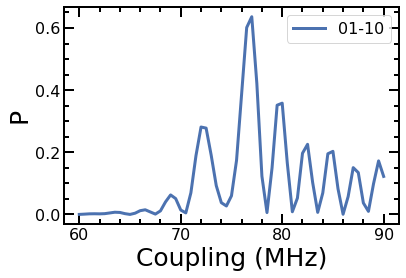

In [10]:
# plt.plot(coupl_array, tr÷ans_prob[:,0],label='01-00')
plt.plot(coupl_array, trans_prob[:,1],label='01-10')
# plt.plot(coupl_array, trans_prob[:,2],label='01-01')
# plt.plot(coupl_array, trans_prob[:,3],label='01-11')
plt.xlabel('Coupling (MHz)')
plt.ylabel('P')
plt.legend()
print (coupl_array[np.argmax(trans_prob[:,1])])

# Calibrate gate

In [11]:
coupl_const = 77
coupl_const = coupl_const*1e-3 * 2 *np.pi
H1 = coupl_const*(XI) 
H2 = coupl_const*(IX)
U_t = evol_gates_2d.evolution_operator_microwave_nonorm(H0,H1,H2, t_points=t_points, DRAG = drag, DRAG_coefficient = drag_coeff,
        T_gate=T_gate, shape=shape, sigma=sigma, T_rise = T_rise, omega_d1=drive_freq1, omega_d2 = drive_freq2)

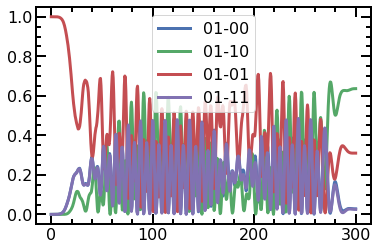

In [13]:
trans_prob_01_00 = expect(state_00*state_00.dag(), U_t*state_01)
trans_prob_01_10 = expect(state_10*state_10.dag(), U_t*state_01)
trans_prob_01_01 = expect(state_01*state_01.dag(), U_t*state_01)
trans_prob_01_11 = expect(state_11*state_11.dag(), U_t*state_01)

plt.plot(t_points, trans_prob_01_00, label = '01-00')
plt.plot(t_points, trans_prob_01_10, label = '01-10')
plt.plot(t_points, trans_prob_01_01, label = '01-01')
plt.plot(t_points, trans_prob_01_11, label = '01-11')
plt.legend()

# Try some rotations + iSWAP here

In [ ]:
#Define ZZ gate
def rzz(phase):
    gate = np.diag([1,1,1, np.exp(-1j*phase)])
    gate = Qobj(gate)
    gate.dims = [[2, 2], [2, 2]]
    return gate

In [ ]:
#Define general iswap gate
def iswapp(phase_01, phase_10, phase_11):
    gate = np.diag(np.zeros((4), dtype = complex))
    gate[0,0] = 1
    gate[1,2] = np.exp(1j*phase_01)
    gate[2,1] = np.exp(1j*phase_10)
    gate[3,3] = np.exp(1j*phase_11)
    gate = Qobj(gate)
    gate.dims = [[2, 2], [2, 2]]
    return gate

In [ ]:
print(iswapp(np.pi/2,np.pi/2,np.pi))

## Correct single qubit gates

In [ ]:
from qutip.qip.operations import*
state_0 = basis(2,0)
state_1 = basis(2,1)
state_pX = (state_0 + state_1)/np.sqrt(2)
state_mX = (state_0 - state_1)/np.sqrt(2)
state_pY = (state_0 + 1j*state_1)/np.sqrt(2)
state_mY = (state_0 - 1j*state_1)/np.sqrt(2)

phase_array = np.linspace(-np.pi, np.pi, 6001)
result = np.zeros_like(phase_array)

#Here, we assume an iswap with some errors
phase_01 = np.pi/2 + 0.2
phase_10 = np.pi/2 + 0.3
phase_11 = 0.15
U = iswapp(phase_01, phase_10, phase_11)
# U = iswap() * tensor(rz(phase_10), qeye(2)) * tensor(qeye(2), rz(phase_01)) * rzz(phase_11)
print (np.angle(U[1,2])-np.pi/2)

# Now, we sweep the single qubit phases to check
ini_state = tensor(state_pX, state_0) #+0
meas_op = tensor(state_0*state_0.dag(), state_mY*state_mY.dag())

for idx, p in enumerate(phase_array):
    gate = tensor(qeye(2), rz(p)) * U
    result[idx] = expect(meas_op, gate*ini_state)
    
plt.plot(phase_array, result)
print (phase_array[np.argmin(result)])


In [ ]:
U = iswapp(phase_01, phase_10, phase_11)
print (np.angle(U[2,1])-np.pi/2)

# Now, we sweep the single qubit phases to check
ini_state = tensor(state_0, state_pX)
meas_op = tensor(state_mY*state_mY.dag(), state_0*state_0.dag())

for idx, p in enumerate(phase_array):
    gate = tensor(rz(p), qeye(2)) * U
    result[idx] = expect(meas_op, gate*ini_state)
    
plt.plot(phase_array, result)
print (phase_array[np.argmin(result)])

In [ ]:
Uni = tensor(rz(-0.3), rz(-0.2)) * U
u11 = Uni[3,3]
u00 = Uni[0,0]
print (np.angle(u11/u00))

In [ ]:
U = iswapp(phase_01, phase_10, phase_11)

# Now, we sweep the ZZ phase to check
ini_state = tensor(state_mX, state_pX)
meas_op = tensor(state_pX*state_pX.dag(), state_pX*state_pX.dag())

for idx, p in enumerate(phase_array):
    gate = tensor(rz(-0.3), rz(-0.2+p)) * U
    result[idx] = expect(meas_op, gate*ini_state)
    
plt.plot(phase_array, result)
print (phase_array[np.argmin(result)])

In [ ]:
print (cphase(np.pi))

In [ ]:
print (ry(np.pi/2))

In [ ]:
U = iswap()*tensor(rz(0.2), qeye(2))*tensor(qeye(2), rz(0.5))*rzz(0.1)
U = U*tensor(rz(-1.1), qeye(2))
# U = U*tensor(rz(-0.2), qeye(2))*tensor(qeye(2), rz(-0.5))
for idx, p in enumerate(phase_array):
    gate = U*tensor(rz(p), qeye(2)) * U * tensor(rz(p), qeye(2))
    result[idx] = expect(meas_op, gate*tensor(state_sup, state_sup))
plt.plot(phase_array, result)
print (phase_array[np.argmin(result)])

In [ ]:
U_real = iswapp(np.pi/2+0.02, np.pi/2+0.02, 17*np.pi/180)
U_ideal = iswap()
op1 = U_real.dag() * U_real
op2 = U_real * U_ideal.dag()
fidel = (op1.tr() + (abs(op2.tr())) ** 2) / 20.0
print (fidel)
# print (U)

In [ ]:
phase_array = np.linspace(-2*np.pi, 2*np.pi, 1001)
result = np.zeros_like(phase_array)
U = iswap()
meas_op = tensor(state_sup*state_sup.dag(), state_sup*state_sup.dag())

for idx, p in enumerate(phase_array):
    gate = U*tensor(rz(p), qeye(2)) * U * tensor(rz(p), qeye(2))
    result[idx] = expect(meas_op, gate*tensor(state_sup, state_sup))
plt.plot(phase_array, result)

In [ ]:
U=iswapp(np.pi/2+0.00, np.pi/2+0.00, 17*np.pi/180)
state_p = (state_0 + state_1)/np.sqrt(2)
state_m = (state_0 - state_1)/np.sqrt(2)
ini_state_array = [tensor(state_p,state_p), tensor(state_p,state_m), tensor(state_m,state_p), tensor(state_m,state_m)]
meas_op = [tensor(state_p*state_p.dag(), state_p*state_p.dag()), tensor(state_p*state_p.dag(), state_m*state_m.dag()), tensor(state_m*state_m.dag(), state_p*state_p.dag()), tensor(state_m*state_m.dag(), state_m*state_m.dag())]

In [ ]:
result = np.zeros((4,4))
for idx, state in enumerate(ini_state_array):
    for idy, meas in enumerate(meas_op):
        result[idx,idy] = expect(meas,U*state)

In [ ]:
print (result)

In [ ]:
prep_generator = [qeye(2), ry(np.pi/2.0), rx(np.pi/2.0), sigmax()]
prep_rotations = []
for q1gate in prep_generator:
    for q2gate in prep_generator:
        gate = (tensor(q1gate, q2gate))
        prep_rotations.append(gate)

meas_generator = [qeye(2), sigmax(), sigmay(), sigmaz()]
meas_rotations = []
for q1gate in meas_generator:
    for q2gate in meas_generator:
        gate = (tensor(q1gate, q2gate))
        meas_rotations.append(gate)
        
p_in = np.zeros((16,16)) 
p_out = np.zeros((16,16)) 

gnd_state = tensor(basis(2,0), basis(2,0))
# gate_op = tensor(qeye(2), rx(np.pi/2))
# gate_op = tensor(rx(np.pi/2), qeye(2))
# gate_op = cnot()
# gate_op = cphase(np.pi)
# gate_op = iswap()*tensor(rz(1.1), qeye(2))*tensor(qeye(2),rz(0.9))
gate_op = iswap()
for i, rot_i in enumerate(prep_rotations):
    for j, rot_j in enumerate(meas_rotations):
        p_in[i,j] = expect(rot_j, rot_i*gnd_state)
        p_out[i,j] = expect(rot_j, gate_op*(rot_i*gnd_state))        
ptm_ideal_2q = np.linalg.lstsq(p_in, p_out)[0]

str_primitive = ["I","X","Y","Z"]
op_label = []
for prim1 in str_primitive:
    for prim2 in str_primitive:
        op_label.append(prim1+prim2)
# print (op_label)
qutip.hinton(ptm_ideal_2q, xlabels = op_label, ylabels = op_label)

In [ ]:
print (iswap())

In [ ]:
U = iswap()*tensor(rz(0.1), qeye(2))*tensor(qeye(2), rz(0.5))
U = U * tensor(rz(-0.5969026041820604), qeye(2))
print (U)
for idx, p in enumerate(phase_array):
    gate = U*tensor(qeye(2), rz(p))*U*tensor(qeye(2), rz(p))
    result[idx] = expect(meas_op, gate*tensor(state_sup, state_0))
plt.plot(phase_array, result)
print (phase_array[np.argmin(result)])